# Predict survival on the Titanic (Kaggle)

## Import the data and EDA

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


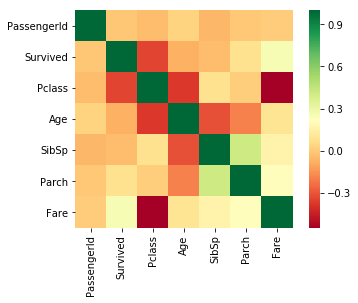

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')
plt.show()

## Conditional plots
Before we dive into the prediction model, let's generate conditional plots using [FacetGrid](http://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid).

One condition :

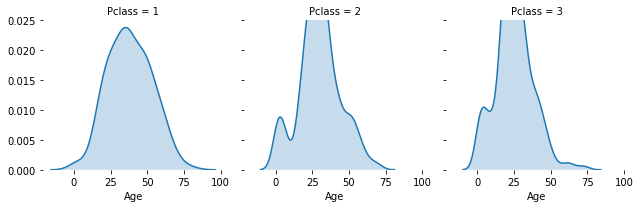

In [3]:
import seaborn as sns
g = sns.FacetGrid(df[['Age','Pclass']].dropna(), col='Pclass', size=3)
g.map(sns.kdeplot,'Age', shade=True)
sns.despine(left=True, bottom=True)
plt.show()

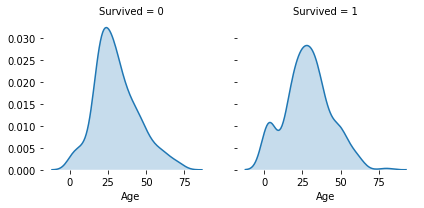

In [4]:
import seaborn as sns
g = sns.FacetGrid(df[['Age','Survived']].dropna(), col='Survived', size=3)
g.map(sns.kdeplot,'Age', shade=True)
sns.despine(left=True, bottom=True)
plt.show()

Multiple conditions :

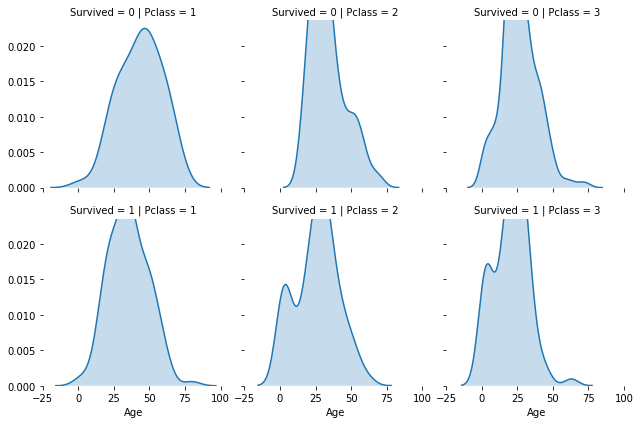

In [6]:
g = sns.FacetGrid(df[['Age','Survived','Pclass']].dropna(), col="Pclass", row="Survived")
g.map(sns.kdeplot, "Age", shade=True)
sns.despine(left=True, bottom=True)
plt.show()

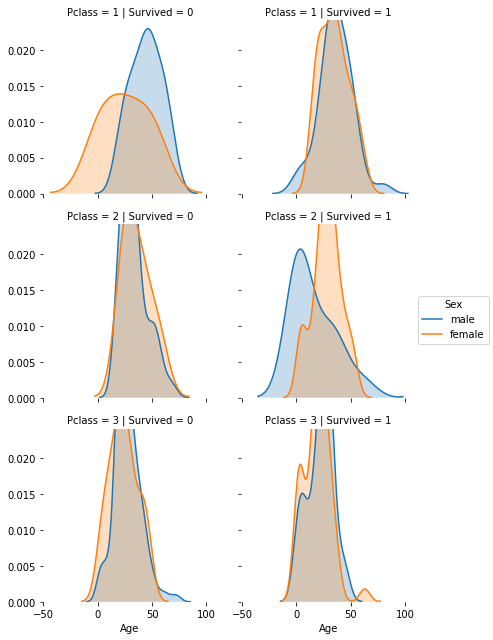

In [13]:
g = sns.FacetGrid(df[['Age','Survived','Pclass','Sex']].dropna(), col="Survived", row="Pclass", hue='Sex', size=3, legend_out=True)
g.map(sns.kdeplot, "Age", shade=True).add_legend()
sns.despine(left=True, bottom=True)
plt.show()

## Preparing X, y

In [5]:
# Define the lambda function: categorize_label
categorize_label = lambda x: x.astype('category')

# Convert Sex, Embarked to a categorical type
df[['Sex', 'Embarked']] = df[['Sex', 'Embarked']].apply(categorize_label, axis=0)

# Convert 

# Print the converted dtypes
print(df[['Sex', 'Embarked']].dtypes)

Sex         category
Embarked    category
dtype: object


In [6]:
df = pd.read_csv('train.csv')
df_sex_emb = pd.get_dummies(df[['Sex','Embarked']], drop_first=True)
df_sex_emb.head()

df['Sex_male'] = df_sex_emb['Sex_male']
df['Embarked_S'] = df_sex_emb['Embarked_S']
df['Embarked_Q'] = df_sex_emb['Embarked_Q']
df = df.drop(['Sex','Embarked'], axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_S,Embarked_Q
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,1,0


In [7]:
X = df[['Pclass','Age','Sex_male','SibSp','Fare', 'Parch', 'Embarked_S','Embarked_Q']]
y = df['Survived']

## Splitting training and test data

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Building the model
Using Pipeline, we can easily try several models :
### Classical models

In [103]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer, PolynomialFeatures
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Edit model step in pipeline
pl = Pipeline([
        ('imputer', Imputer(missing_values='NaN', strategy='mean', axis=0)),
        ('int', PolynomialFeatures(degree=2, interaction_only=True)),
        #('clf_cv', RandomizedSearchCV(DecisionTreeClassifier(), param_dist, cv=5))
        #('logreg_cv', GridSearchCV(LogisticRegression(), param_grid, cv=5))
        #('clf', LogisticRegression())
        #('ridge', Ridge(normalize=True))
        #('clf', LinearRegression())
        ('clf', OneVsRestClassifier(LogisticRegression()))
        #('knn', KNeighborsClassifier(n_neighbors=3))
        #('clf', RandomForestClassifier(n_estimators=20)) # Adjusting parameters
    ])

# Fit to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy: ", accuracy)



Accuracy:  0.80223880597


In [33]:
from sklearn.model_selection import cross_val_score

np.mean(cross_val_score(pl, X, y, cv=5))

0.81933773721206615

### Neural network using Keras
Here, Keras will split the data into training/test sets.

In [151]:
# Import necessary modules
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer, StandardScaler
import keras
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.models import Sequential, save_model
from keras.utils import to_categorical
from keras.optimizers import SGD
from keras.wrappers.scikit_learn import KerasClassifier
import matplotlib.pyplot as plt

# Predictors
predictors = X.as_matrix()

# n_cols
n_cols = predictors.shape[1]

# Convert the target to categorical: target
target = to_categorical(y)

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

def model():
    
    # Set up the model
    model = Sequential()

    # Neural network architecture
    model.add(Dense(250, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(250, activation='relu'))
    model.add(Dense(250, activation='relu'))
    model.add(Dense(250, activation='relu'))

    # Add the output layer
    model.add(Dense(2, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # other optimizer: rmsprop
    
    return model

pl = Pipeline([
        ('imputer', Imputer(missing_values='NaN', strategy='mean', axis=0)),
        ('rescale', StandardScaler()),
        ('kc', KerasClassifier(build_fn=model, nb_epoch=30, validation_split=0.3, callbacks=[early_stopping_monitor], verbose=True))
    ])

# Fit the model
pl.fit(predictors, target)


Train on 623 samples, validate on 268 samples
Epoch 1/10
623/623 [==============================] - 2s 4ms/step - loss: 0.5351 - acc: 0.7673 - val_loss: 0.4246 - val_acc: 0.8358
Epoch 2/10
623/623 [==============================] - 0s 280us/step - loss: 0.4325 - acc: 0.8266 - val_loss: 0.4069 - val_acc: 0.8321
Epoch 3/10
623/623 [==============================] - 0s 278us/step - loss: 0.4148 - acc: 0.8283 - val_loss: 0.4387 - val_acc: 0.8209
Epoch 4/10
623/623 [==============================] - 0s 280us/step - loss: 0.4086 - acc: 0.8283 - val_loss: 0.3829 - val_acc: 0.8507
Epoch 5/10
623/623 [==============================] - 0s 278us/step - loss: 0.4072 - acc: 0.8427 - val_loss: 0.4021 - val_acc: 0.8246
Epoch 6/10
623/623 [==============================] - 0s 285us/step - loss: 0.4006 - acc: 0.8347 - val_loss: 0.4415 - val_acc: 0.8246


Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('rescale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kc', <keras.wrappers.scikit_learn.KerasClassifier object at 0x00000153B3B11E48>)])

### Saving the model

In [130]:
model_step = pl.steps.pop(-1)[1]
save_model(model_step.model,'model.h5')

## Create submission file

In [152]:
df_test = pd.read_csv('test.csv', index_col=0)
df_test.head()

df_test_sex_emb = pd.get_dummies(df_test[['Sex','Embarked']], drop_first=True)
df_test_sex_emb.head()

df_test['Sex_male'] = df_test_sex_emb['Sex_male']
df_test['Embarked_S'] = df_test_sex_emb['Embarked_S']
df_test['Embarked_Q'] = df_test_sex_emb['Embarked_Q']
df_test = df_test.drop(['Sex','Embarked'], axis=1)

df_test.head()

X_df_test = df_test[X_train.columns]

predictions = pl.predict(X_df_test)

prediction_df = pd.DataFrame(columns=['Survived'], index=df_test.index, data=predictions)

prediction_df.to_csv("predictions.csv")

418/418 [==============================] - 1s 2ms/step
